In [42]:
import pandas as pd

In [43]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\spam.csv")

In [44]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.shape

(5572, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [47]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [48]:
df['Category'].replace({'ham': 0, 'spam': 1}, inplace=True)

In [49]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [51]:
df['Message'] = df['Message'].apply(lambda x : str(x))

In [52]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
df['Message'] = [str(x) for x in df['Message']]
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [54]:
x = df['Message']
y = df['Category']
x.shape, y.shape

((5572,), (5572,))

In [55]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [58]:
x_train.shape, x_test.shape

((4457,), (1115,))

In [59]:
y_train.shape , y_test.shape

((4457,), (1115,))

In [60]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer = CountVectorizer()

In [63]:
x_train_vect = vectorizer.fit_transform(x_train)
x_train_vect.shape

(4457, 7701)

In [64]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
x_train_vect.toarray().shape

(4457, 7701)

In [66]:
x_test_vect = vectorizer.transform(x_test)
x_test_vect

<1115x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 13741 stored elements in Compressed Sparse Row format>

In [67]:
x_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
from sklearn.naive_bayes import BernoulliNB

In [69]:
model = BernoulliNB()

In [70]:
model.fit(x_train_vect, y_train)

BernoulliNB()

In [71]:
model.score(x_test_vect, y_test)

0.9802690582959641

In [72]:
emails = ['Hey John can we get together to watch football game tomorrow?',
         'Upto 20% discount on parking, exclusive offer just for you. Dont miss this chance',
         'Get a FREE hoodie by calling 8845545 t&c apply']

In [73]:
email_vect = vectorizer.transform(emails)

In [74]:
email_vect.shape

(3, 7701)

In [75]:
email_vect.toarray().shape

(3, 7701)

In [76]:
model.predict(email_vect)

array([0, 0, 0], dtype=int64)

In [77]:
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB()
model.fit(x_train_vect, y_train)
model.score(x_test_vect, y_test)

0.9919282511210762

In [79]:
model.predict(email_vect)

array([0, 1, 1], dtype=int64)

In [80]:
from sklearn.pipeline import Pipeline

In [82]:
clf = Pipeline([('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [83]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [84]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [85]:
clf.score(x_test, y_test)

0.9919282511210762

In [86]:
clf.predict(emails)

array([0, 1, 1], dtype=int64)

In [87]:
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zyada', 'èn', 'ú1'], dtype=object)

In [88]:
y_pred = clf.predict(x_test)

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
cm = confusion_matrix(y_test, y_pred)

In [92]:
cm

array([[966,   0],
       [  9, 140]], dtype=int64)

In [93]:
import seaborn as sns

<Axes: >

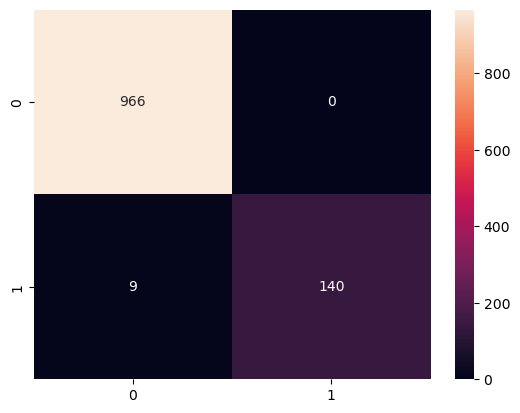

In [97]:
sns.heatmap(cm, annot=True, fmt='d')